In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
oil_data = pd.read_csv("oil.csv")
holiday_data = pd.read_csv("holidays_events.csv", index_col='date',parse_dates=['date'])
store_data = pd.read_csv("stores.csv")

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
transaction_data = pd.read_csv("transactions.csv")

sample = pd.read_csv('sample_submission.csv')

In [3]:
sample['sales'].max()

0.0

In [4]:
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [6]:
train_data.isna().sum() # no data is missing

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [7]:
test_data.isna().sum() # no data is missing

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [8]:
train_data.family.nunique() # there are 33 family of product

33

In [9]:
train = train_data.copy()
train['date'] = pd.to_datetime(train['date'])
train = train.set_index('date')
train = train.drop('id',axis = 1)
train

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0
2013-01-01,1,BABY CARE,0.000,0
2013-01-01,1,BEAUTY,0.000,0
2013-01-01,1,BEVERAGES,0.000,0
2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0
2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,9,PRODUCE,2419.729,148


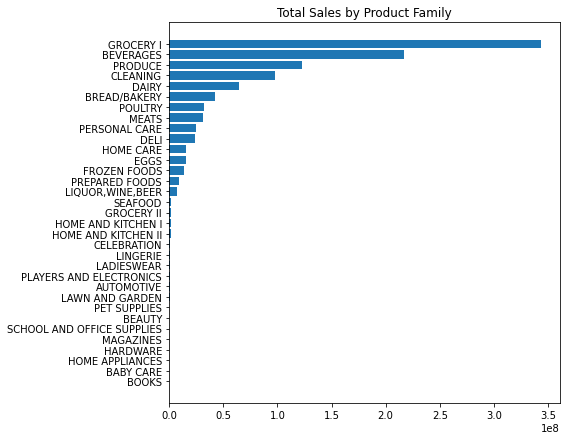

In [10]:
family = train.groupby('family').sales.sum() #group by family

fig, ax = plt.subplots(figsize=(7,7))
plt.barh(family.groupby('family').sum().sort_values().index, family.groupby('family').sum().sort_values())
ax.set(title='Total Sales by Product Family')
plt.show()

In [11]:
total = family.sum()
proportion = ((family/total)*100).sort_values(ascending=False)
proportion = pd.DataFrame(proportion)
proportion.head(10)

,sales
family,
GROCERY I,31.990346
BEVERAGES,20.207284
PRODUCE,11.428795
CLEANING,9.083197
DAIRY,6.006428
BREAD/BAKERY,3.924384
POULTRY,2.968952
MEATS,2.895414
PERSONAL CARE,2.290520


nearly 80% of sales are [GROCERY I, BEVERAGES, PRODUCE, CLEANING, DAIRY] 

In [12]:
train_data.store_nbr.nunique() #There are 54 stores 

54

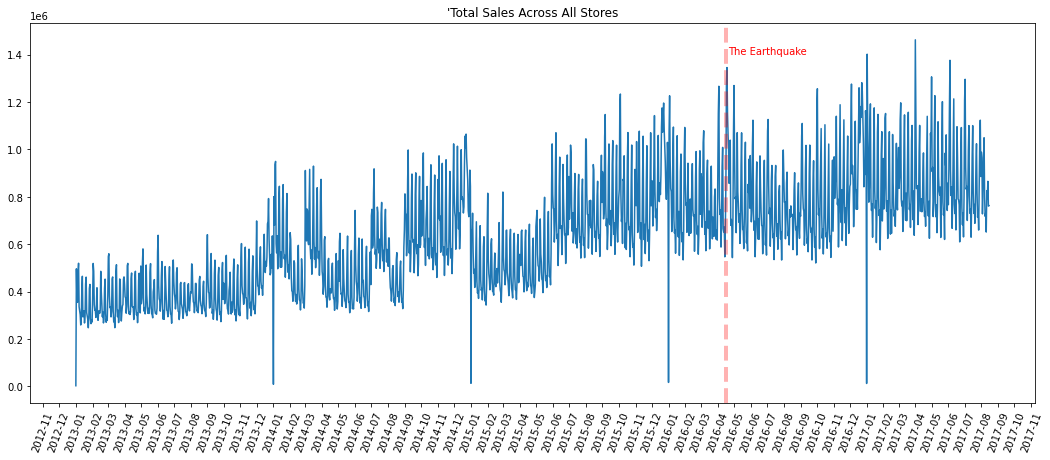

In [13]:
fig, ax = plt.subplots(figsize=(18, 7))
ax.set(title="'Total Sales Across All Stores")
total_sales = train.sales.groupby("date").sum()
plt.plot(total_sales)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=70)
plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=4,alpha=0.3)
plt.text(pd.Timestamp('2016-04-20'),1400000,'The Earthquake',rotation=360,c='r')


plt.show()

In [14]:
oil_data

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [15]:
pd.date_range(start = '2013-01-01', end = '2017-08-15' ).difference(oil_data.index) #Date sales in df_train stop at 2017-08-15

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq=None)

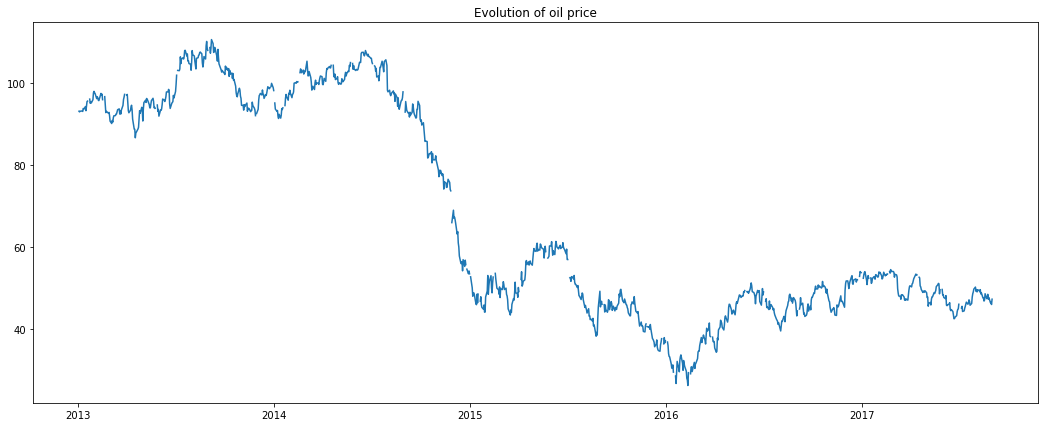

In [16]:
oil_data['date'] = pd.to_datetime(oil_data['date'])

fig, ax = plt.subplots(figsize=(18, 7))

ax.set(title="Evolution of oil price")
x = np.array(oil_data['date'])
y = np.array(oil_data['dcoilwtico'])

plt.plot(x, y);

There is missing a lot of data

In [17]:
oil_data = oil_data.set_index('date')
oil_data = oil_data.resample('1D').sum()
oil_data.reset_index()

,date,dcoilwtico
0,2013-01-01,0.00
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,0.00
...,...,...
1699,2017-08-27,0.00
1700,2017-08-28,46.40
1701,2017-08-29,46.46
1702,2017-08-30,45.96


In [18]:
pd.date_range(start = '2013-01-01', end = '2017-08-15' ).difference(oil_data.index) #Date sales in df_train stop at 2017-08-15

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [19]:
oil_data['dcoilwtico'] = np.where(oil_data['dcoilwtico']==0, np.nan, oil_data['dcoilwtico'])
oil_data['interpolated_price'] = oil_data.dcoilwtico.interpolate()

In [20]:
oil_data = oil_data.drop('dcoilwtico',axis=1)

In [21]:
oil_data['price_chg'] = oil_data.interpolated_price - oil_data.interpolated_price.shift(1)
oil_data['pct_chg'] = oil_data['price_chg']/oil_data.interpolated_price.shift(-1)

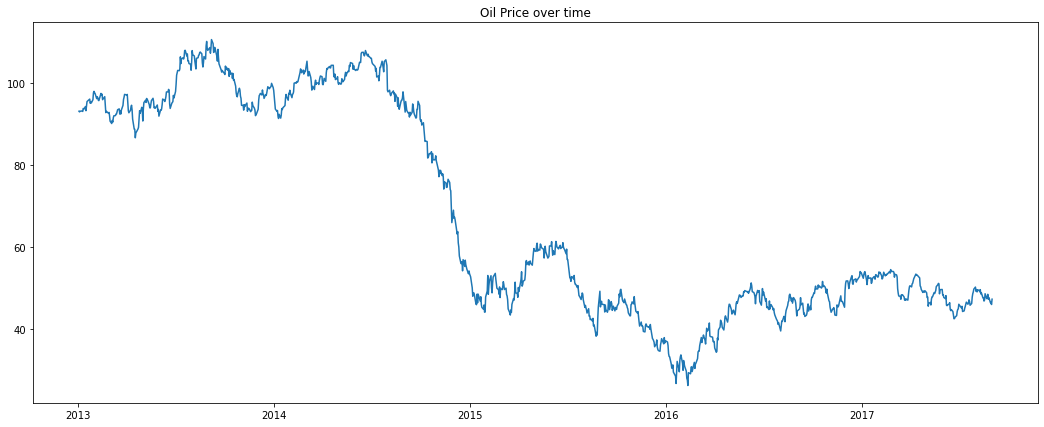

In [22]:
fig,ax = plt.subplots(figsize=(18, 7))
plt.plot(oil_data['interpolated_price'])
plt.title('Oil Price over time')

plt.show()

In [23]:
daily_total_sales = total_sales.copy()

In [24]:
daily_total_sales = daily_total_sales.resample('1D').sum()
daily_total_sales

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-11    826373.722022
2017-08-12    792630.535079
2017-08-13    865639.677471
2017-08-14    760922.406081
2017-08-15    762661.935939
Freq: D, Name: sales, Length: 1688, dtype: float64

In [25]:
oil_data.interpolated_price.loc['2013-01-01':'2017-08-15']

date
2013-01-01          NaN
2013-01-02    93.140000
2013-01-03    92.970000
2013-01-04    93.120000
2013-01-05    93.146667
                ...    
2017-08-11    48.810000
2017-08-12    48.403333
2017-08-13    47.996667
2017-08-14    47.590000
2017-08-15    47.570000
Freq: D, Name: interpolated_price, Length: 1688, dtype: float64

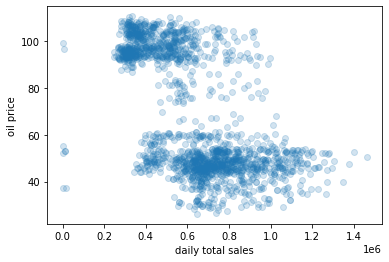

In [26]:
plt.scatter(daily_total_sales, oil_data.interpolated_price.loc['2013-01-01':'2017-08-15'],alpha=0.2)
plt.ylabel('oil price')
plt.xlabel('daily total sales')
plt.show()

In [27]:
transaction_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [28]:
store_data.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [29]:
# merging train and stoer data
join_df = train.merge(store_data,on='store_nbr')

#get the date and set it as index
join_df['date'] = train.index
join_df = join_df.set_index('date')

join_df

,store_nbr,family,sales,onpromotion,city,state,type,cluster
date,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6


#### group by type of store

In [30]:
mean_sales_type = join_df.groupby('type').sales.mean()
median_sales_type = join_df.groupby('type').sales.median()
number = join_df.groupby('type').store_nbr.nunique()

type_df = pd.DataFrame((mean_sales_type,median_sales_type,number))
type_df = type_df.T
type_df.columns = ['mean','median','number of store']

type_df

,mean,median,number of store
type,,,
A,705.878743,24.0,9.0
B,326.739714,7.0,8.0
C,197.263301,5.0,15.0
D,350.979407,16.0,18.0
E,269.121301,4.0,4.0


#### group by cluster

In [31]:
mean_sales_cluster = join_df.groupby('cluster').sales.mean()
median_sales_cluster = join_df.groupby('cluster').sales.median()
number=join_df.groupby('cluster').store_nbr.nunique()

cluster_df = pd.DataFrame((mean_sales_cluster,median_sales_cluster,number))
cluster_df = cluster_df.T
cluster_df.columns = ['mean','median','number of store']

cluster_df.sort_values('mean', ascending=False)

,mean,median,number of store
cluster,,,
5,1117.245254,75.0,1.0
14,708.227718,36.0,4.0
8,647.377856,42.0,3.0
11,603.507018,5.0,3.0
17,592.231511,27.0,1.0
6,342.661732,7.0,6.0
1,326.163967,15.0,3.0
12,324.461406,10.0,1.0
13,324.364108,14.0,4.0


#### group by states

In [32]:
mean_sales_state = join_df.groupby('state').sales.mean()
median_sales_state = join_df.groupby('state').sales.median()
number=join_df.groupby('state').store_nbr.nunique()

state_df = pd.DataFrame((mean_sales_state,median_sales_state,number))
state_df = state_df.T
state_df.columns = ['mean','median','number of store']

state_df.sort_values('mean', ascending=False)

,mean,median,number of store
state,,,
Pichincha,554.110358,23.0,19.0
Tungurahua,362.632273,21.0,2.0
Loja,339.379530,22.0,1.0
El Oro,300.392253,13.0,2.0
Esmeraldas,294.963151,7.0,1.0
Azuay,294.924279,8.0,3.0
Los Rios,287.243342,10.0,2.0
Guayas,270.172671,7.0,11.0
Bolivar,234.821670,8.0,1.0


#### sales by day of week

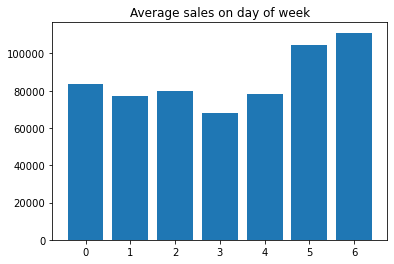

In [33]:
day_group = train.reset_index()[['date','sales']]
day_group = day_group.groupby('date')
day_group = day_group.sales.mean().to_frame()
day_group['dow'] = day_group.index.day_of_week
day_group = day_group.groupby('dow').sum()

plt.bar(day_group.index,day_group['sales'])
plt.title('Average sales on day of week')

plt.show()

as we can see that during the week-end the sales is very good

#### sales by month of year

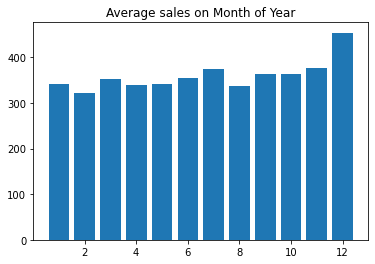

In [34]:
month_group = train['sales'].to_frame()
month_group['moy'] = month_group.index.month
month_group = month_group.groupby('moy').sales.mean().to_frame()
plt.bar(month_group.index,month_group['sales'])
plt.title('Average sales on Month of Year')
plt.show()

as we can see that during December the sales is very good

In [35]:
holiday_data

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


In [36]:
h_df = holiday_data.copy()
h_df['dow'] = h_df.index.dayofweek+1
h_df['work_day'] = True
h_df.loc[h_df['dow']>5, 'work_day'] = False #make work_day false for sat and sun (6/7 in dow)


#make the 'work_day' column False for the "National scale" holiday in weekday
h_df.loc[(h_df['type'] == 'Holiday')& (h_df['locale'].str.contains('National')) ,  'work_day'] = False 
h_df.loc[(h_df['type'] == 'Additional')& (h_df['locale'].str.contains('National')) ,  'work_day'] = False 
h_df.loc[(h_df['type'] == 'Bridge')& (h_df['locale'].str.contains('National')) ,  'work_day'] = False 
h_df.loc[(h_df['type'] == 'Transfer')& (h_df['locale'].str.contains('National')) ,  'work_day'] = False 
h_df.loc[h_df['type'] == 'Work day', 'work_day'] = True 
#some day in the list explicitly stat the workday


# now we can drop locale since the national are non working day and the other local event are still a working day
h_df = h_df.drop('locale', axis = 1)

h_df.head(50)

,type,locale_name,description,transferred,dow,work_day
date,,,,,,
2012-03-02,Holiday,Manta,Fundacion de Manta,False,5,True
2012-04-01,Holiday,Cotopaxi,Provincializacion de Cotopaxi,False,7,False
2012-04-12,Holiday,Cuenca,Fundacion de Cuenca,False,4,True
2012-04-14,Holiday,Libertad,Cantonizacion de Libertad,False,6,False
2012-04-21,Holiday,Riobamba,Cantonizacion de Riobamba,False,6,False
2012-05-12,Holiday,Puyo,Cantonizacion del Puyo,False,6,False
2012-06-23,Holiday,Guaranda,Cantonizacion de Guaranda,False,6,False
2012-06-25,Holiday,Imbabura,Provincializacion de Imbabura,False,1,True
2012-06-25,Holiday,Latacunga,Cantonizacion de Latacunga,False,1,True


In [37]:
ny_dic = {'type': 'Holiday','locale':'National','locale_name':'Ecuador','description': 'New Year Day','transferred':'False'}
ny_date = pd.to_datetime(['2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01'])

In [38]:
for date in ny_date:
    holiday_data.loc[date] = ['Holiday','National', 'Ecuador', 'New Year day','False']

In [39]:
h_df.where(h_df['transferred'] == True).dropna()

,type,locale_name,description,transferred,dow,work_day
date,,,,,,
2012-10-09,Holiday,Ecuador,Independencia de Guayaquil,1.0,2.0,0.0
2013-10-09,Holiday,Ecuador,Independencia de Guayaquil,1.0,3.0,0.0
2014-10-09,Holiday,Ecuador,Independencia de Guayaquil,1.0,4.0,0.0
2016-05-24,Holiday,Ecuador,Batalla de Pichincha,1.0,2.0,0.0
2016-07-25,Holiday,Guayaquil,Fundacion de Guayaquil,1.0,1.0,1.0
2016-08-10,Holiday,Ecuador,Primer Grito de Independencia,1.0,3.0,0.0
2017-01-01,Holiday,Ecuador,Primer dia del ano,1.0,7.0,0.0
2017-04-12,Holiday,Cuenca,Fundacion de Cuenca,1.0,3.0,1.0
2017-05-24,Holiday,Ecuador,Batalla de Pichincha,1.0,3.0,0.0


In [40]:
h_df.loc[(h_df['transferred'] == True), 'work_day'] = True
#h_df.head(50)

In [41]:
h_df.loc[h_df['description'].str.contains('futbol'), 'description'] = 'Football'
h_df.loc[h_df['description'].str.contains('Terremoto'), 'description'] = 'Earthquake'

In [42]:
sales = train.groupby('date').sales.sum()
event = h_df[h_df['type']=='Event']

event_merge = event.merge(sales,how='left',left_index=True,right_index=True)
event_merge.head()

,type,locale_name,description,transferred,dow,work_day,sales
date,,,,,,,
2013-05-12,Event,Ecuador,Dia de la Madre,False,7,False,387860.505015
2014-05-11,Event,Ecuador,Dia de la Madre,False,7,False,454512.928937
2014-06-12,Event,Ecuador,Football,False,4,True,329408.067360
2014-06-15,Event,Ecuador,Football,False,7,False,441279.933994
2014-06-20,Event,Ecuador,Football,False,5,True,369206.789547


In [43]:
print('mean of daily sale across country: {}'.format(train.groupby('date').sales.sum().mean()))
print('--------------------')
print(('mean of sale across country in event day: {}'.format(event_merge.groupby('description').sales.mean())))

mean of daily sale across country: 637556.3849186875
--------------------
mean of sale across country in event day: description
Black Friday       647508.781658
Cyber Monday       777344.484674
Dia de la Madre    621092.051781
Earthquake         881919.056300
Football           554139.887353
Name: sales, dtype: float64


In [44]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [45]:
print(min(train_data['date']))
print(max(train_data['date']))

2013-01-01
2017-08-15


In [46]:
object_cols = [cname for cname in train_data.columns 
               if train_data[cname].dtype == "object" 
               and cname != "date"]

print("Categorical variables:")
object_cols 

Categorical variables:


['family']

In [47]:
num_cols = [cname for cname in train_data.columns 
            if train_data[cname].dtype in ['int64', 'float64']]

print("Numerical variables:")
num_cols 

Numerical variables:


['id', 'store_nbr', 'sales', 'onpromotion']

In [48]:
all_cols = num_cols + object_cols
print(all_cols)

['id', 'store_nbr', 'sales', 'onpromotion', 'family']


In [49]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_data[object_cols] = ordinal_encoder.fit_transform(train_data[object_cols])
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,0.0,0.000,0
1,1,2013-01-01,1,1.0,0.000,0
2,2,2013-01-01,1,2.0,0.000,0
3,3,2013-01-01,1,3.0,0.000,0
4,4,2013-01-01,1,4.0,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28.0,438.133,0
3000884,3000884,2017-08-15,9,29.0,154.553,1
3000885,3000885,2017-08-15,9,30.0,2419.729,148
3000886,3000886,2017-08-15,9,31.0,121.000,8


In [50]:
scaler = MinMaxScaler(feature_range=(0,1))

for col in num_cols:
    scaled_data = scaler.fit_transform(train_data[col].values.reshape(-1,1))
    train_data[col] = pd.Series(scaled_data.flatten())

train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0.000000e+00,2013-01-01,0.0,0.0,0.0,0.0
1,3.332348e-07,2013-01-01,0.0,1.0,0.0,0.0
2,6.664696e-07,2013-01-01,0.0,2.0,0.0,0.0
3,9.997044e-07,2013-01-01,0.0,3.0,0.0,0.0
4,1.332939e-06,2013-01-01,0.0,4.0,0.0,0.0


In [51]:
train_data = train_data.groupby(['date']).agg({'sales':'mean', 'onpromotion':'mean'})
train_data.head(31)

,sales,onpromotion
date,,
2013-01-01,0.000011,0.0
2013-01-02,0.002232,0.0
2013-01-03,0.001626,0.0
2013-01-04,0.001595,0.0
2013-01-05,0.002148,0.0
2013-01-06,0.002338,0.0
2013-01-07,0.001512,0.0
2013-01-08,0.001432,0.0
2013-01-09,0.001361,0.0


In [52]:
train_data.shape

(1684, 2)

In [53]:
x_train = train_data.copy()
y_train = train_data.sales.copy()

In [54]:
len(x_train.columns)

2

In [55]:
from keras.preprocessing.sequence import TimeseriesGenerator

num_feature_input = len(x_train.columns) # 2 
history_input = 30

"""
length: Number of past time steps to be included, 
batch_size: The amount of predicted days. Here we have 1 since we are trying to predict the next day using the last 30 days.
"""

generator = TimeseriesGenerator(x_train, y_train, length=history_input, batch_size = 1)

# Print the first sequence, you should see 30 past day (x) for 1 predicted day (y)
for i in range(len(generator)):
    x , y = generator[i]
    print('%s => %s' % (x , y))
    break

[[[1.13010918e-05 0.00000000e+00]
  [2.23218011e-03 0.00000000e+00]
  [1.62640375e-03 0.00000000e+00]
  [1.59490009e-03 0.00000000e+00]
  [2.14784868e-03 0.00000000e+00]
  [2.33838232e-03 0.00000000e+00]
  [1.51239286e-03 0.00000000e+00]
  [1.43241371e-03 0.00000000e+00]
  [1.36124486e-03 0.00000000e+00]
  [1.16529593e-03 0.00000000e+00]
  [1.30368188e-03 0.00000000e+00]
  [1.81447030e-03 0.00000000e+00]
  [2.09065264e-03 0.00000000e+00]
  [1.31992821e-03 0.00000000e+00]
  [1.34594081e-03 0.00000000e+00]
  [1.43241432e-03 0.00000000e+00]
  [1.20361619e-03 0.00000000e+00]
  [1.33244809e-03 0.00000000e+00]
  [1.94586381e-03 0.00000000e+00]
  [2.07469660e-03 0.00000000e+00]
  [1.40030279e-03 0.00000000e+00]
  [1.33282550e-03 0.00000000e+00]
  [1.27452842e-03 0.00000000e+00]
  [1.11248811e-03 0.00000000e+00]
  [1.30496464e-03 0.00000000e+00]
  [1.86190230e-03 0.00000000e+00]
  [1.93664941e-03 0.00000000e+00]
  [1.28443510e-03 0.00000000e+00]
  [1.19007398e-03 0.00000000e+00]
  [1.26464150e

In [56]:
#generator.shape

In [57]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

def Multi_Step_LSTM_model():
    
    # Use Keras sequential model
    model = Sequential()    
    
    # First LSTM layer with Dropout regularisation; Set return_sequences to True to feed outputs to next layer
    model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (history_input, num_feature_input))) 
    model.add(Dropout(0.2))
    
    # Second LSTM layer with Dropout regularisation; Set return_sequences to True to feed outputs to next layer
    model.add(LSTM(units = 50,  activation='relu', return_sequences = True))                                    
    model.add(Dropout(0.2))
    
    # Final LSTM layer with Dropout regularisation; Set return_sequences to False since now we will be predicting with the output layer
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    # The output layer with linear activation to predict Open stock price
    model.add(Dense(units=1, activation = "linear"))
    
    return model

In [58]:
model = Multi_Step_LSTM_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10600     
_________________________________________________________________
dropout (Dropout)            (None, 30, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae', 'MeanAbsoluteError'])

In [60]:
model.fit_generator(generator, steps_per_epoch=len(generator), epochs=20, verbose=2)

D:\Anaconda\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1654/1654 - 47s - loss: 5.2955e-06 - mae: 0.0018 - mean_absolute_error: 0.0018
Epoch 2/20
1654/1654 - 28s - loss: 2.3447e-06 - mae: 0.0012 - mean_absolute_error: 0.0012
Epoch 3/20
1654/1654 - 27s - loss: 1.7159e-06 - mae: 0.0011 - mean_absolute_error: 0.0011
Epoch 4/20
1654/1654 - 28s - loss: 1.6676e-06 - mae: 0.0010 - mean_absolute_error: 0.0010
Epoch 5/20
1654/1654 - 27s - loss: 1.5761e-06 - mae: 0.0010 - mean_absolute_error: 0.0010
Epoch 6/20
1654/1654 - 28s - loss: 1.5514e-06 - mae: 0.0010 - mean_absolute_error: 0.0010
Epoch 7/20
1654/1654 - 29s - loss: 1.4973e-06 - mae: 9.8624e-04 - mean_absolute_error: 9.8624e-04
Epoch 8/20
1654/1654 - 28s - loss: 1.5260e-06 - mae: 9.9184e-04 - mean_absolute_error: 9.9184e-04
Epoch 9/20
1654/1654 - 29s - loss: 1.4913e-06 - mae: 9.8310e-04 - mean_absolute_error: 9.8310e-04
Epoch 10/20
1654/1654 - 31s - loss: 1.5383e-06 - mae: 9.9489e-04 - mean_absolute_error: 9.9489e-04
Epoch 11/20
1654/1654 - 27s - loss: 1.5192e-06 - mae: 9.8825e-04 - 

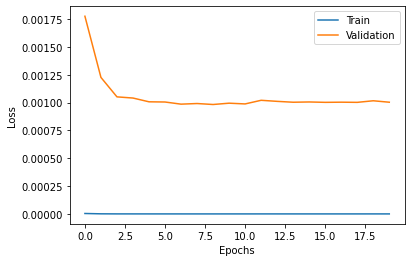

In [61]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['mae'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

In [64]:
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


# https://www.kaggle.com/code/minhajulhoque/deep-learning-multivariate-rnn-lstm-network

In [65]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
transaction_data = pd.read_csv("transactions.csv")


In [66]:
df_train = train_data
df_test = test_data

In [67]:
df_train["family"].nunique(dropna=True)


33

In [68]:
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [69]:
# dropping the onpromotion coz it won't be used

train_data = df_train.copy().drop(['onpromotion'], axis=1)
test_data = df_test.copy().drop(['onpromotion'], axis=1)

In [70]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [71]:
ordinal_encoder = OrdinalEncoder(dtype=int)
train_data[['family']] = ordinal_encoder.fit_transform(train_data[['family']])
test_data[['family']] = ordinal_encoder.transform(test_data[['family']])

In [72]:
train_data

,id,date,store_nbr,family,sales
0,0,2013-01-01,1,0,0.000
1,1,2013-01-01,1,1,0.000
2,2,2013-01-01,1,2,0.000
3,3,2013-01-01,1,3,0.000
4,4,2013-01-01,1,4,0.000
...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133
3000884,3000884,2017-08-15,9,29,154.553
3000885,3000885,2017-08-15,9,30,2419.729
3000886,3000886,2017-08-15,9,31,121.000


In [73]:
#counting number of days
n_o_days_train=train_data["date"].nunique(dropna = False) 
print('number of day train:',n_o_days_train)

# number of store
n_o_stores_train=train_data["store_nbr"].nunique(dropna = False) 
print('number of stores train:',n_o_stores_train)

# number of family
n_o_families_train=train_data["family"].nunique(dropna = False) 
print('number of family/type of prod train:',n_o_families_train)

number of day train: 1684
number of stores train: 54
number of family/type of prod train: 33


In [74]:
##counting the number of days
n_o_days_test=test_data["date"].nunique(dropna = False) 
print('number of day test:',n_o_days_test)

# number of store
n_o_stores_test=test_data["store_nbr"].nunique(dropna = False) 
print('number of stores test:',n_o_stores_test)

# number of family
n_o_families_test=test_data["family"].nunique(dropna = False) 
print('number of family/type of prod test:',n_o_families_test)

number of day test: 16
number of stores test: 54
number of family/type of prod test: 33


The data need to be re-organized as discrete-time data (days) date as timestamp/time-series input, store number and family as columns and sales is the numerical data of interest for RNN

In [75]:
pivoted_train = train_data.pivot(index=['date'], columns=['store_nbr', 'family'], values='sales')
pivoted_train.head()

store_nbr     1                                                               \
family       0    1    2       3    4        5    6       7      8        9    
date                                                                           
2013-01-01  0.0  0.0  0.0     0.0  0.0    0.000  0.0     0.0    0.0    0.000   
2013-01-02  2.0  0.0  2.0  1091.0  0.0  470.652  0.0  1060.0  579.0  164.069   
2013-01-03  3.0  0.0  0.0   919.0  0.0  310.655  0.0   836.0  453.0  151.582   
2013-01-04  3.0  0.0  3.0   953.0  0.0  198.366  0.0   827.0  460.0  131.411   
2013-01-05  5.0  0.0  3.0  1160.0  0.0  301.057  0.0   811.0  464.0  118.613   

store_nbr   ...    9                                                     \
family      ...   23       24     25   26   27       28    29   30   31   
date        ...                                                           
2013-01-01  ...  0.0    0.000    0.0  0.0  0.0    0.000   0.0  0.0  0.0   
2013-01-02  ...  0.0  374.531  482.0  0.0  0.0  651.292  83.0  0.0  0.0   
2013-01-03  ...  0.0  400.863  372.0  0.0  0.0  509.496  66.0  0.0  0.0   
2013-01-04  ...  0.0  310.878  324.0  0.0  0.0  332.672  57.0  0.0  0.0   
2013-01-05  ...  0.0  447.685  461.0  0.0  0.0  510.919  84.0  0.0  0.0   

store_nbr           
family          32  
date                
2013-01-01   0.000  
2013-01-02  29.214  
2013-01-03  25.000  
2013-01-04  11.000  
2013-01-05  28.361  

[5 rows x 1782 columns]

In [76]:
pivoted_train[1][0]

date
2013-01-01    0.0
2013-01-02    2.0
2013-01-03    3.0
2013-01-04    3.0
2013-01-05    5.0
             ... 
2017-08-11    1.0
2017-08-12    6.0
2017-08-13    1.0
2017-08-14    1.0
2017-08-15    4.0
Name: 0, Length: 1684, dtype: float64

## Splitting the data into train and validation

In [77]:
train_samples = int(n_o_days_train*0.95)
train_samples

1599

In [78]:
train_samples_df = pivoted_train[:train_samples]
train_samples_df

store_nbr     1                                                                \
family       0    1    2       3    4        5     6       7      8        9    
date                                                                            
2013-01-01  0.0  0.0  0.0     0.0  0.0    0.000   0.0     0.0    0.0    0.000   
2013-01-02  2.0  0.0  2.0  1091.0  0.0  470.652   0.0  1060.0  579.0  164.069   
2013-01-03  3.0  0.0  0.0   919.0  0.0  310.655   0.0   836.0  453.0  151.582   
2013-01-04  3.0  0.0  3.0   953.0  0.0  198.366   0.0   827.0  460.0  131.411   
2013-01-05  5.0  0.0  3.0  1160.0  0.0  301.057   0.0   811.0  464.0  118.613   
...         ...  ...  ...     ...  ...      ...   ...     ...    ...      ...   
2017-05-18  4.0  0.0  2.0  2154.0  0.0  350.502  12.0   669.0  718.0  132.686   
2017-05-19  5.0  0.0  4.0  2743.0  0.0  481.324  24.0   826.0  957.0  177.191   
2017-05-20  4.0  0.0  3.0  2379.0  0.0  392.965   7.0   588.0  795.0  140.261   
2017-05-21  1.0  0.0  1.0   974.0  0.0  161.529   1.0   243.0  337.0   75.683   
2017-05-22  2.0  0.0  5.0  2620.0  1.0  418.029  16.0   712.0  754.0  129.027   

store_nbr   ...    9                                                       \
family      ...   23         24     25    26    27         28          29   
date        ...                                                             
2013-01-01  ...  0.0    0.00000    0.0   0.0   0.0    0.00000    0.000000   
2013-01-02  ...  0.0  374.53100  482.0   0.0   0.0  651.29200   83.000000   
2013-01-03  ...  0.0  400.86300  372.0   0.0   0.0  509.49600   66.000000   
2013-01-04  ...  0.0  310.87800  324.0   0.0   0.0  332.67200   57.000000   
2013-01-05  ...  0.0  447.68500  461.0   0.0   0.0  510.91900   84.000000   
...         ...  ...        ...    ...   ...   ...        ...         ...   
2017-05-18  ...  4.0  541.15700  344.0  19.0  12.0  313.56600   73.060000   
2017-05-19  ...  2.0  264.74400  268.0   6.0   8.0  477.29602   79.421000   
2017-05-20  ...  5.0  373.00400  569.0  10.0  12.0  503.79500  151.274000   
2017-05-21  ...  2.0  492.31302  636.0  10.0  18.0  688.77600  149.067000   
2017-05-22  ...  4.0  319.78200  345.0   8.0   9.0  321.63200  111.423004   

store_nbr                              
family             30   31         32  
date                                   
2013-01-01     0.0000  0.0   0.000000  
2013-01-02     0.0000  0.0  29.214000  
2013-01-03     0.0000  0.0  25.000000  
2013-01-04     0.0000  0.0  11.000000  
2013-01-05     0.0000  0.0  28.361000  
...               ...  ...        ...  
2017-05-18  1262.8600  7.0  12.544001  
2017-05-19  1149.9869  2.0   9.238000  
2017-05-20  2008.8520  3.0  27.380001  
2017-05-21  2424.7440  7.0  39.710000  
2017-05-22  1413.0350  2.0  19.097000  

[1599 rows x 1782 columns]

In [79]:
valid_samples_df = pivoted_train[train_samples:]
valid_samples_df

store_nbr     1                                                        \
family       0    1    2       3    4          5     6      7      8    
date                                                                    
2017-05-23  4.0  0.0  1.0  2365.0  1.0  413.15200   8.0  822.0  736.0   
2017-05-24  7.0  0.0  1.0  2611.0  1.0  349.68100  11.0  944.0  867.0   
2017-05-25  2.0  0.0  1.0  2229.0  0.0  372.38500  18.0  706.0  723.0   
2017-05-26  1.0  0.0  0.0  1100.0  0.0  190.73300   7.0  303.0  375.0   
2017-05-27  1.0  0.0  2.0  2270.0  0.0  300.78600  10.0  462.0  634.0   
...         ...  ...  ...     ...  ...        ...   ...    ...    ...   
2017-08-11  1.0  0.0  1.0  1006.0  0.0  145.60700   4.0  341.0  343.0   
2017-08-12  6.0  0.0  3.0  1659.0  0.0  243.22000   3.0  351.0  526.0   
2017-08-13  1.0  0.0  1.0   803.0  0.0  136.67900   1.0  169.0  266.0   
2017-08-14  1.0  0.0  6.0  2201.0  0.0  346.03800   4.0  571.0  699.0   
2017-08-15  4.0  0.0  4.0  1942.0  0.0  329.54102  21.0  703.0  602.0   

store_nbr            ...     9                                         \
family           9   ...    23       24     25    26    27         28   
date                 ...                                                
2017-05-23  127.909  ...   1.0  284.679  340.0   5.0  12.0  328.32900   
2017-05-24  166.068  ...   1.0  318.254  292.0   6.0  12.0  360.76498   
2017-05-25  122.562  ...   1.0  415.299  260.0   7.0  10.0  261.97600   
2017-05-26   82.697  ...   5.0  378.795  382.0   9.0   9.0  533.20300   
2017-05-27   99.587  ...   3.0  412.021  455.0   8.0  11.0  541.38000   
...             ...  ...   ...      ...    ...   ...   ...        ...   
2017-08-11   64.302  ...   5.0  309.245  373.0  11.0   2.0  525.22400   
2017-08-12   99.488  ...   2.0  260.298  400.0   7.0  10.0  383.38700   
2017-08-13   47.770  ...   3.0  327.206  510.0   2.0   9.0  412.45800   
2017-08-14  154.578  ...  12.0  330.975  445.0   2.0  14.0  283.42900   
2017-08-15  116.402  ...  11.0  449.228  522.0   6.0   6.0  438.13300   

store_nbr                                           
family             29         30     31         32  
date                                                
2017-05-23  127.40600  2268.3320    1.0  16.063000  
2017-05-24  104.61800  1180.0780    2.0  18.163000  
2017-05-25  110.95700   920.1430    5.0   2.994000  
2017-05-26  169.91900  1515.1750   13.0  20.683000  
2017-05-27  134.74800  1634.6849    5.0  43.512000  
...               ...        ...    ...        ...  
2017-08-11  112.10000  1453.0780  140.0  23.831000  
2017-08-12  129.90399  1419.2640  138.0  16.859001  
2017-08-13  105.16900  1693.6070  200.0  20.000000  
2017-08-14  114.12000  1348.4250  182.0  17.000000  
2017-08-15  154.55300  2419.7290  121.0  16.000000  

[85 rows x 1782 columns]

### Scaling the data

In [80]:
minmax = MinMaxScaler()
minmax.fit(train_samples_df)

scaled_train_samples = minmax.transform(train_samples_df)
scaled_val_samples = minmax.transform(valid_samples_df)

In [81]:
scaled_train_samples[10:]

array([[0.16666667, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.1939255 ],
       [0.11111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.32272206],
       [0.11111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.24110331],
       ...,
       [0.22222222, 0.        , 0.25      , ..., 0.49480247, 0.00920245,
        0.45467379],
       [0.05555556, 0.        , 0.08333333, ..., 0.59724127, 0.02147239,
        0.65942643],
       [0.11111111, 0.        , 0.41666667, ..., 0.34804615, 0.00613497,
        0.31712582]])

In [82]:
scaled_val_samples[10:]

array([[1.05555556, 0.        , 0.08333333, ..., 0.35775819, 0.01840491,
        0.1826666 ],
       [0.44444444, 0.        , 0.08333333, ..., 0.49624388, 0.01533742,
        0.48497982],
       [0.        , 0.        , 0.16666667, ..., 0.62189011, 0.05214724,
        0.78270978],
       ...,
       [0.05555556, 0.        , 0.08333333, ..., 0.41715414, 0.61349693,
        0.33212109],
       [0.05555556, 0.        , 0.5       , ..., 0.33213199, 0.55828221,
        0.28230293],
       [0.22222222, 0.        , 0.33333333, ..., 0.59600602, 0.37116564,
        0.26569687]])

sliding window for converting series to sample to be used with supervised learning algorithm

In [83]:
# n_past --> no. of past observations
# n_future --> no.of past observations

def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
            
        # slicing past and future
        past, future = series[window_start:past_end,:], series[past_end:future_end,:]
        X.append(past)
        y.append(future)
    
    return np.array(X), np.array(y)

n_past =16
n_future = 16
n_features = n_o_stores_train * n_o_families_train # num of features

Now converting the data via split_series function

In [84]:
X_train, y_train = split_series(scaled_train_samples, n_past, n_future)
X_val, y_val = split_series(scaled_val_samples, n_past, n_future)

In [85]:
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_val.shape',X_val.shape)
print('y_val.shape',y_val.shape)

X_train.shape (1568, 16, 1782)
y_train.shape (1568, 16, 1782)
X_val.shape (54, 16, 1782)
y_val.shape (54, 16, 1782)


# Traning the model - LSTM

In [86]:
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.layers import Dropout, BatchNormalization, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [87]:
model = Sequential()

model.add(LSTM(units=256, return_sequences=True,input_shape=[n_past, n_features]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#TimeDistributed layer
model.add(TimeDistributed(Dense(n_features)))

model.compile(loss="mae", optimizer=Adam(learning_rate=0.001), metrics=['mae'])

In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16, 256)           2087936   
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 256)           1024      
_________________________________________________________________
dropout (Dropout)            (None, 16, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16, 128)           197120    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 128)           512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 16, 1782)          2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_mae', 
                           min_delta=0.0001,
                           patience=100,
                           restore_best_weights=True)

epochs= 1000

model_history = model.fit(X_train, y_train, 
                          validation_data=(X_val, y_val),
                          epochs = epochs,
                          callbacks = [early_stop],
                          batch_size=512,
                          shuffle=True)

Epoch 1/1000
4/4 [==============================] - 7s 828ms/step - loss: 0.3600 - mae: 0.3600 - val_loss: 0.2396 - val_mae: 0.2396
Epoch 2/1000
4/4 [==============================] - 3s 611ms/step - loss: 0.2711 - mae: 0.2711 - val_loss: 0.2367 - val_mae: 0.2367
Epoch 3/1000
4/4 [==============================] - 3s 605ms/step - loss: 0.2426 - mae: 0.2426 - val_loss: 0.2357 - val_mae: 0.2357
Epoch 4/1000
4/4 [==============================] - 2s 576ms/step - loss: 0.2291 - mae: 0.2291 - val_loss: 0.2313 - val_mae: 0.2313
Epoch 5/1000
4/4 [==============================] - 2s 570ms/step - loss: 0.2190 - mae: 0.2190 - val_loss: 0.2279 - val_mae: 0.2279
Epoch 6/1000
4/4 [==============================] - 2s 571ms/step - loss: 0.2111 - mae: 0.2111 - val_loss: 0.2228 - val_mae: 0.2228
Epoch 7/1000
4/4 [==============================] - 2s 566ms/step - loss: 0.2031 - mae: 0.2031 - val_loss: 0.2159 - val_mae: 0.2159
Epoch 8/1000
4/4 [==============================] - 2s 567ms/step - loss: 0.

4/4 [==============================] - 3s 756ms/step - loss: 0.0605 - mae: 0.0605 - val_loss: 0.1057 - val_mae: 0.1057
Epoch 63/1000
4/4 [==============================] - 3s 701ms/step - loss: 0.0630 - mae: 0.0630 - val_loss: 0.0923 - val_mae: 0.0923
Epoch 64/1000
4/4 [==============================] - 3s 687ms/step - loss: 0.0643 - mae: 0.0643 - val_loss: 0.0955 - val_mae: 0.0955
Epoch 65/1000
4/4 [==============================] - 3s 722ms/step - loss: 0.0618 - mae: 0.0618 - val_loss: 0.0941 - val_mae: 0.0941
Epoch 66/1000
4/4 [==============================] - 3s 750ms/step - loss: 0.0604 - mae: 0.0604 - val_loss: 0.0852 - val_mae: 0.0852
Epoch 67/1000
4/4 [==============================] - ETA: 0s - loss: 0.0598 - mae: 0.059 - 3s 664ms/step - loss: 0.0598 - mae: 0.0598 - val_loss: 0.0844 - val_mae: 0.0844
Epoch 68/1000
4/4 [==============================] - 3s 670ms/step - loss: 0.0595 - mae: 0.0595 - val_loss: 0.0847 - val_mae: 0.0847
Epoch 69/1000
4/4 [==========================

4/4 [==============================] - 3s 638ms/step - loss: 0.0472 - mae: 0.0472 - val_loss: 0.0813 - val_mae: 0.0813
Epoch 124/1000
4/4 [==============================] - 3s 637ms/step - loss: 0.0473 - mae: 0.0473 - val_loss: 0.0812 - val_mae: 0.0812
Epoch 125/1000
4/4 [==============================] - 3s 636ms/step - loss: 0.0471 - mae: 0.0471 - val_loss: 0.0832 - val_mae: 0.0832
Epoch 126/1000
4/4 [==============================] - 3s 638ms/step - loss: 0.0470 - mae: 0.0470 - val_loss: 0.0808 - val_mae: 0.0808
Epoch 127/1000
4/4 [==============================] - 3s 641ms/step - loss: 0.0469 - mae: 0.0469 - val_loss: 0.0805 - val_mae: 0.0805
Epoch 128/1000
4/4 [==============================] - 3s 637ms/step - loss: 0.0468 - mae: 0.0468 - val_loss: 0.0815 - val_mae: 0.0815
Epoch 129/1000
4/4 [==============================] - 3s 641ms/step - loss: 0.0466 - mae: 0.0466 - val_loss: 0.0804 - val_mae: 0.0804
Epoch 130/1000
4/4 [==============================] - 3s 643ms/step - loss: 0

4/4 [==============================] - 3s 713ms/step - loss: 0.0442 - mae: 0.0442 - val_loss: 0.0744 - val_mae: 0.0744
Epoch 185/1000
4/4 [==============================] - 3s 695ms/step - loss: 0.0442 - mae: 0.0442 - val_loss: 0.0739 - val_mae: 0.0739
Epoch 186/1000
4/4 [==============================] - 3s 717ms/step - loss: 0.0441 - mae: 0.0441 - val_loss: 0.0736 - val_mae: 0.0736
Epoch 187/1000
4/4 [==============================] - 3s 740ms/step - loss: 0.0440 - mae: 0.0440 - val_loss: 0.0739 - val_mae: 0.0739
Epoch 188/1000
4/4 [==============================] - 3s 774ms/step - loss: 0.0440 - mae: 0.0440 - val_loss: 0.0741 - val_mae: 0.0741
Epoch 189/1000
4/4 [==============================] - 3s 799ms/step - loss: 0.0440 - mae: 0.0440 - val_loss: 0.0736 - val_mae: 0.0736
Epoch 190/1000
4/4 [==============================] - 4s 804ms/step - loss: 0.0441 - mae: 0.0441 - val_loss: 0.0742 - val_mae: 0.0742
Epoch 191/1000
4/4 [==============================] - 3s 713ms/step - loss: 0

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_mae'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
X_test_pred = scaled_val_samples[-n_past:,:].reshape((1, n_past, n_features))
print(X_test_pred.shape)
scaled_test_predict = model.predict(X_test_pred)

In [ ]:
scaled_test_predict.shape

In [ ]:
model_history.history

In [ ]:
print('-------------------- Evaluation on Training Data --------------------')
for item in model_history.history:
    print("Final", item, ":", model_history.history[item][-1])
print("")


In [ ]:
model.evaluate(X_val, y_val)

In [ ]:
X_train_pred = scaled_train_samples[-n_past:,:].reshape((1, n_past, n_features))
print(X_train_pred.shape)
scaled_train_predict = model.predict(X_test_pred)

In [ ]:
scaled_train_predict.shape

In [ ]:
# Inverse transform from the previous min max scaler
y_predict = pd.DataFrame(minmax.inverse_transform(scaled_test_predict.reshape((n_future, n_features))),columns=valid_samples_df.columns)

In [ ]:
y_predict

In [ ]:
pivoted_test = test_data.pivot(index=['date'], columns=['store_nbr', 'family'], values=None)
pivoted_test

In [ ]:
pivoted_test.values

In [ ]:
pivoted_train.values

# Submitting resulting csv file for Kaggle competition

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
## mapping ypredict to pivoted test data
for day_ith, day_ith_pred in y_predict.iterrows():
    #day_ith iteration, 16 days in totals
    #day_ith_pred, predicted data of 9 stores, 33 classes of good for each day
    #Iterate over DataFrame rows as (index, Series) pairs.
#     print(n_samples_per_day)
    # n_samples_per_day number of 
    for n_samples_per_day in range(len(day_ith_pred)): ## iterating the number of sample, from 0 to 1781, for 16 days
#         print(pivoted_test.iloc[[day_ith], [n_samples_per_day]])
        sample_id = pivoted_test.iloc[[day_ith], [n_samples_per_day]].values[0][0] #total number of samples
        values= max(0,day_ith_pred.values[n_samples_per_day]) #price that is negative will be set to 0
        print(values)

In [ ]:
#submission

# https://www.kaggle.com/code/karan842/store-sales-forecasting-eda-lstm